<a href="https://colab.research.google.com/github/ARUNREDDYPOREDDY/AIML-2303A52278/blob/main/AIML_LAB_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_openml
movies_data = fetch_openml(data_id=803)

In [4]:
type(movies_data)

sklearn.utils._bunch.Bunch

In [5]:
movies_data.details['version']

'1'

In [6]:
print(movies_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). It converts the numeric target feature to a two-class nominal target feature by computing the mean and classifying all instances with a lower target value as positive ('P') and all others as negative ('N').

Downloaded from openml.org.


In [7]:
movies_data.feature_names

['RollRate', 'PitchRate', 'currPitch', 'currRoll', 'diffRollRate']

In [8]:
movies_data = movies_data.frame
movies_data.head()

,RollRate,PitchRate,currPitch,currRoll,diffRollRate,binaryClass
0,0.0020,0.0025,0.015,0.010,-0.00004,P
1,-0.0023,0.0003,0.022,-0.011,0.00005,N
2,0.0059,-0.0006,0.014,-0.005,0.00017,P
3,0.0046,0.0001,0.011,0.015,-0.00009,P
4,-0.0076,0.0012,0.010,0.001,-0.00010,N


In [9]:
type(movies_data)

pandas.core.frame.DataFrame

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(movies_data, test_size=0.1,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 6416 
The size of testing data is: 713


In [11]:
train_data.describe()

,RollRate,PitchRate,currPitch,currRoll,diffRollRate
count,6416.000000,6416.000000,6416.000000,6416.000000,6416.000000
mean,0.000474,0.001029,0.010764,0.002662,-0.000017
std,0.006159,0.001867,0.005407,0.015897,0.000213
min,-0.017200,-0.007500,-0.006000,-0.050000,-0.001060
25%,-0.005000,-0.000200,0.007000,-0.009000,-0.000150
50%,0.002200,0.000900,0.010000,0.004000,-0.000020
75%,0.005500,0.002200,0.014000,0.012000,0.000120
max,0.017700,0.010800,0.041000,0.051000,0.000820


In [12]:
train_data.isnull().sum()

,0
RollRate,0
PitchRate,0
currPitch,0
currRoll,0
diffRollRate,0
binaryClass,0


In [13]:
train_data['RollRate'].value_counts()

,count
RollRate,
0.0038,79
0.0047,76
0.0039,76
0.0040,74
0.0041,70
...,...
0.0151,1
-0.0168,1
-0.0138,1


<Axes: xlabel='RollRate', ylabel='count'>

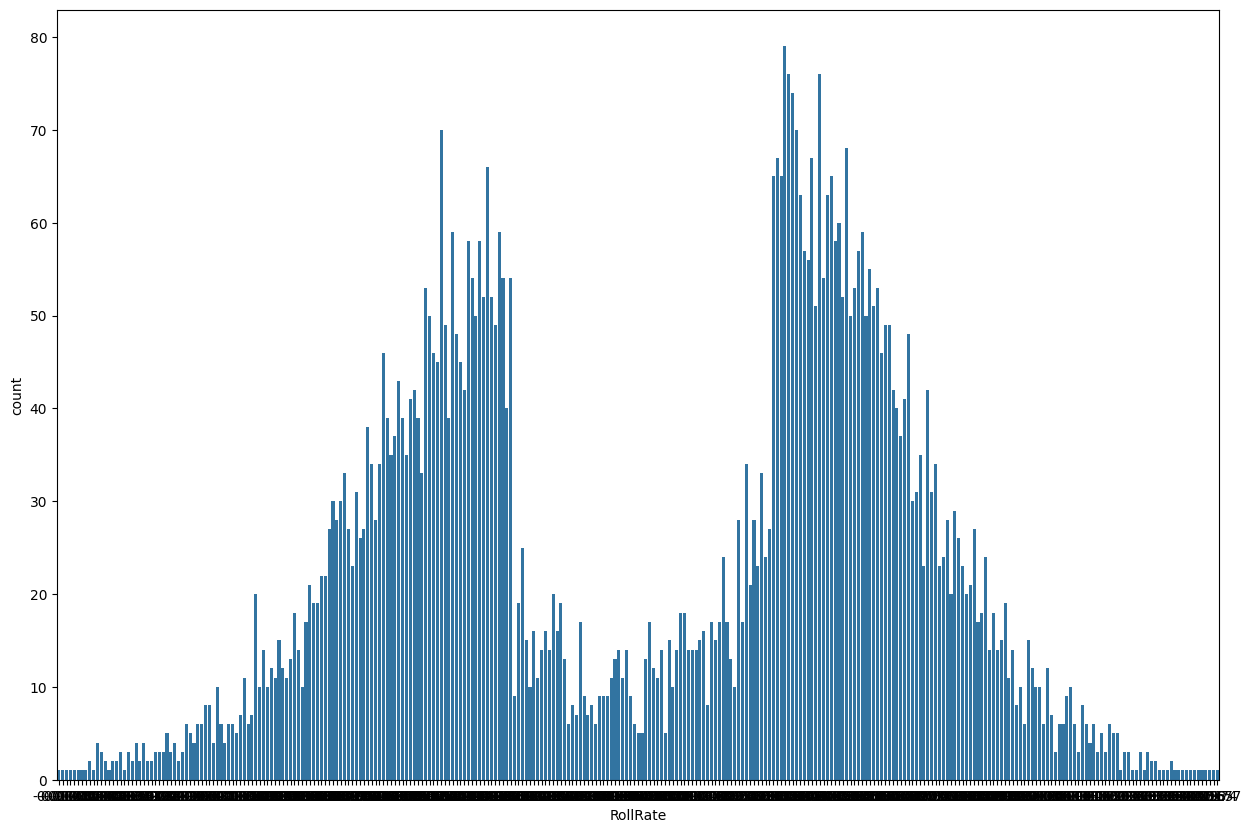

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='RollRate')

<Axes: xlabel='RollRate', ylabel='count'>

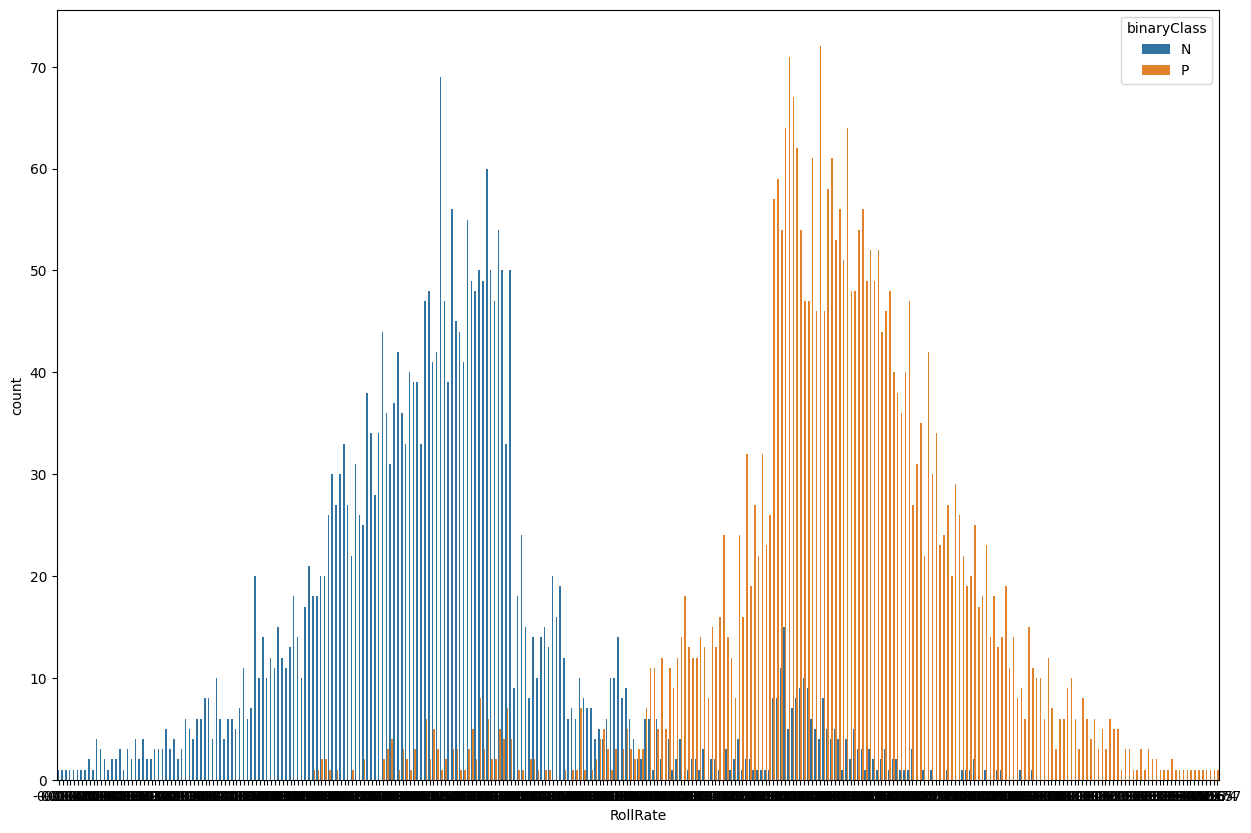

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='RollRate', hue='binaryClass')

In [16]:
train_data['PitchRate'].value_counts()

,count
PitchRate,
0.0004,169
0.0007,163
0.0008,162
0.0001,154
0.0013,153
...,...
-0.0050,1
0.0075,1
0.0089,1


<Axes: xlabel='PitchRate', ylabel='count'>

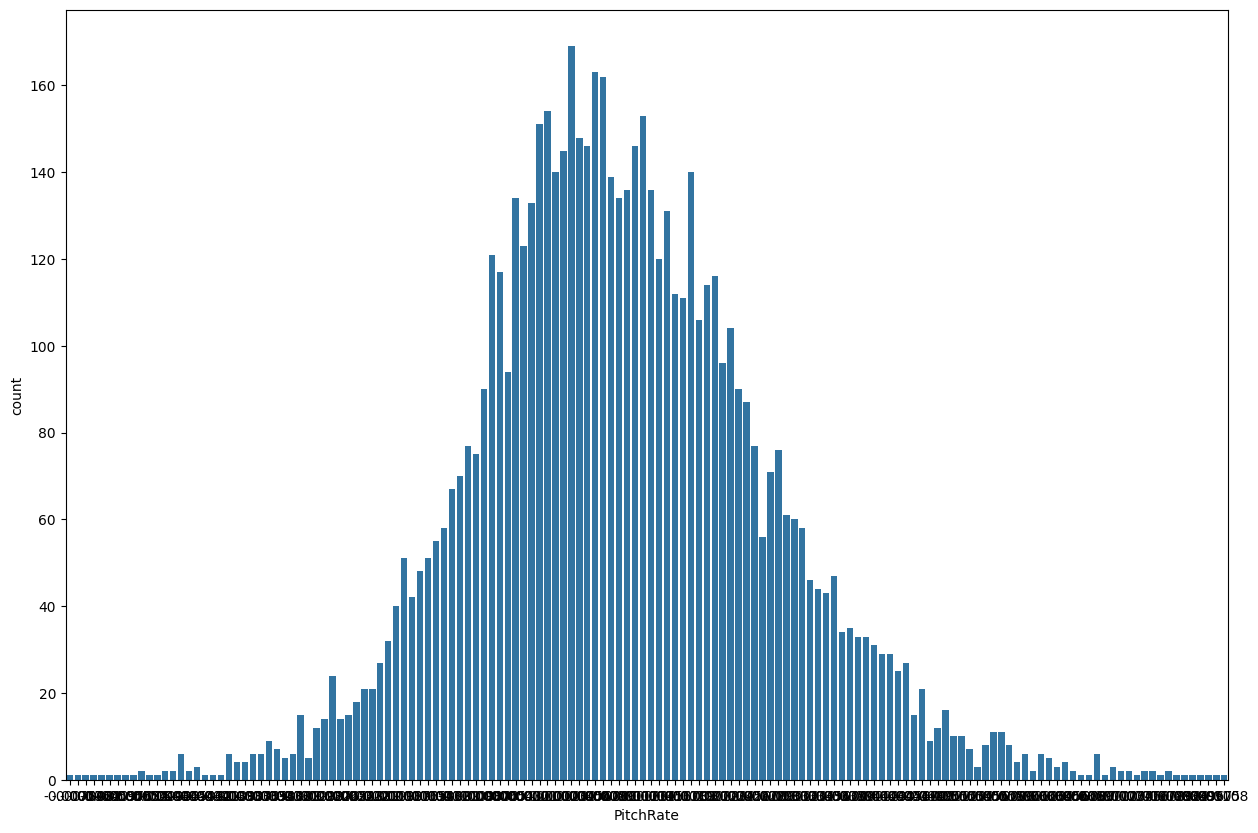

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='PitchRate')

<Axes: xlabel='PitchRate', ylabel='count'>

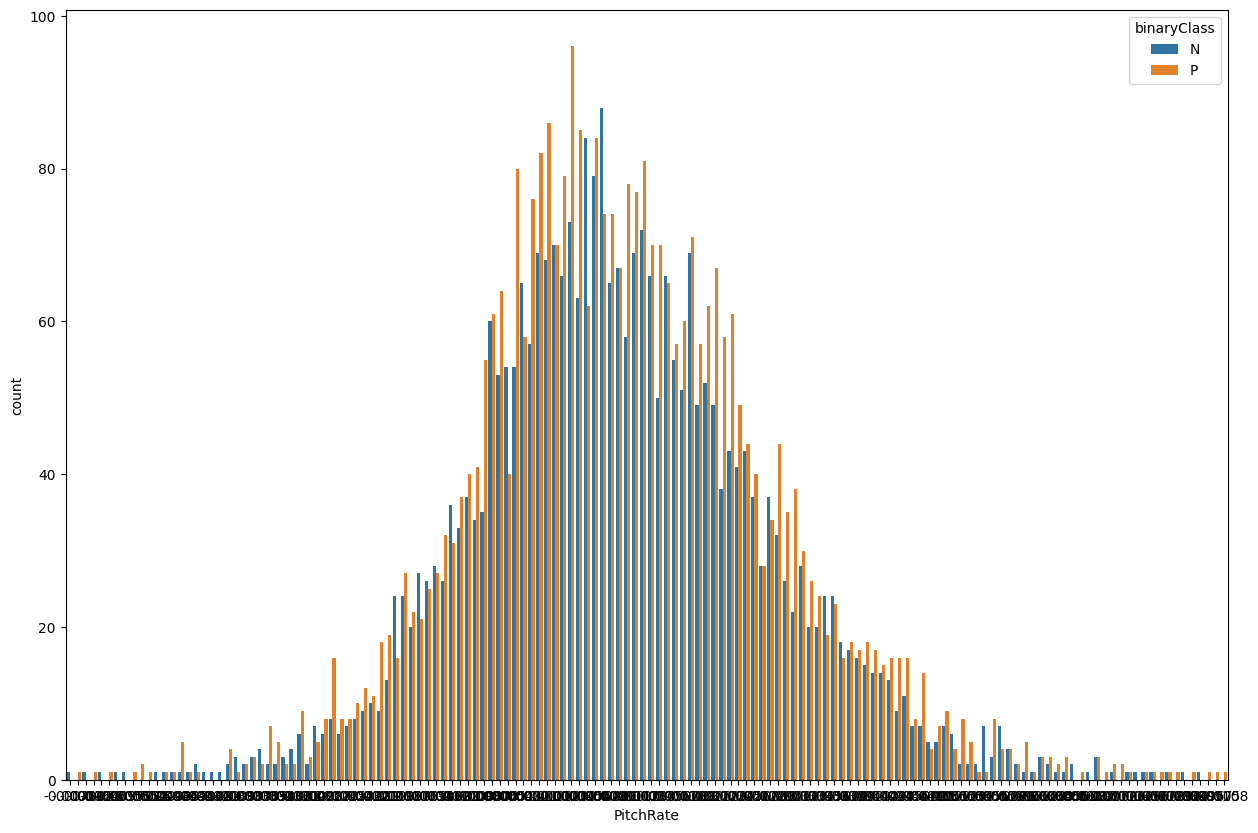

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='PitchRate', hue='binaryClass')

In [19]:
train_data['currPitch'].value_counts()

,count
currPitch,
0.009,546
0.010,544
0.012,530
0.011,528
0.008,476
0.013,427
0.007,397
0.014,373
0.006,339


<Axes: xlabel='currPitch', ylabel='count'>

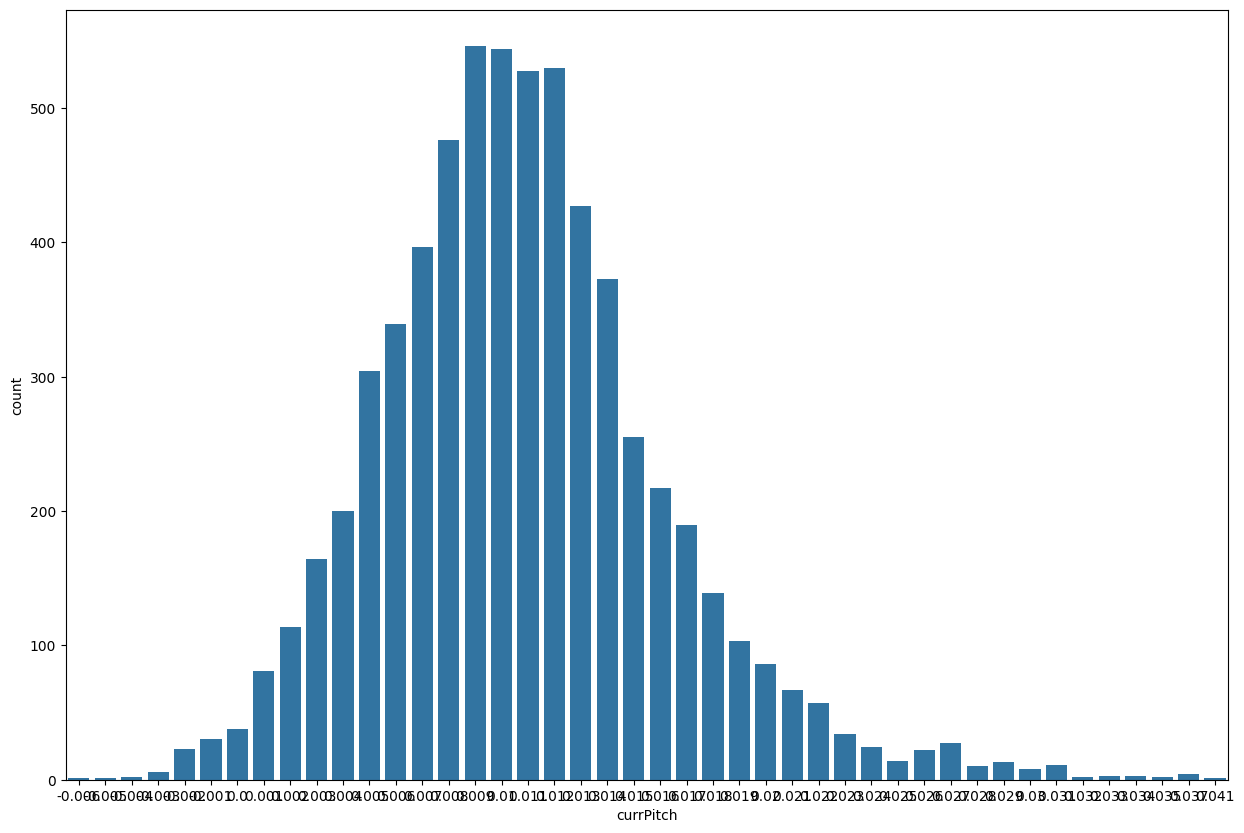

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='currPitch')

<Axes: xlabel='currPitch', ylabel='count'>

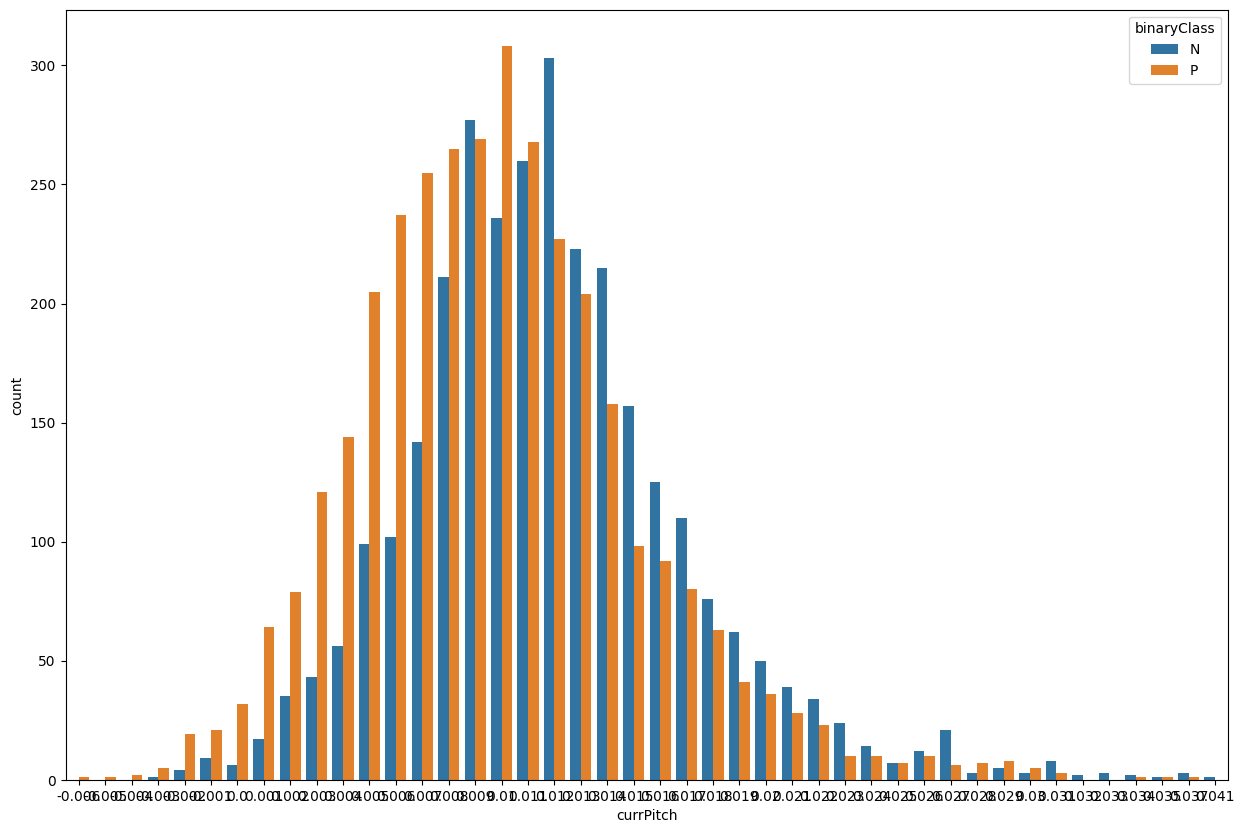

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='currPitch', hue='binaryClass')

In [22]:
train_data['currRoll'].value_counts()

,count
currRoll,
0.010,317
-0.010,285
0.011,284
-0.011,236
-0.007,208
...,...
0.044,2
-0.048,2
-0.050,1


<Axes: xlabel='currRoll', ylabel='count'>

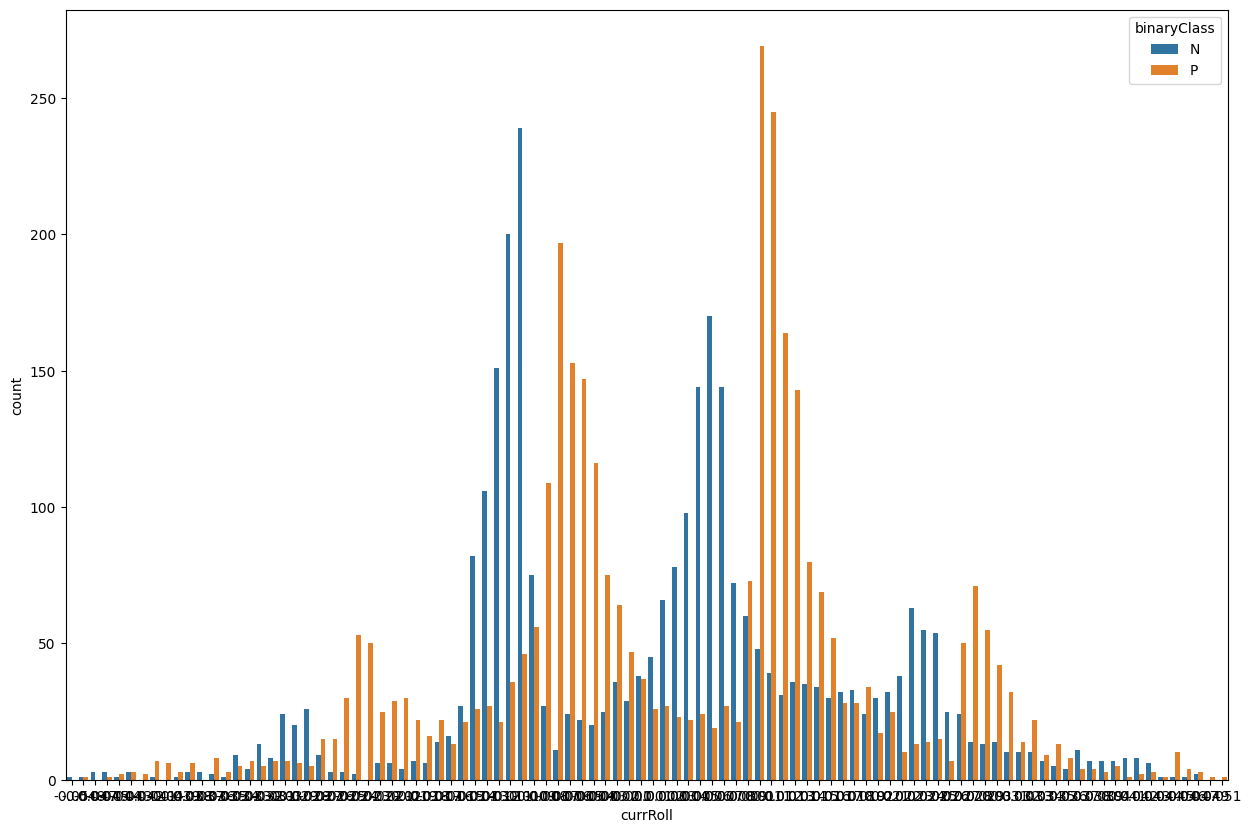

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='currRoll', hue='binaryClass')

In [24]:
train_data['diffRollRate'].value_counts()

,count
diffRollRate,
-0.00001,163
-0.00004,146
0.00000,138
-0.00006,135
-0.00002,134
...,...
0.00068,1
-0.00091,1
-0.00063,1


<Axes: xlabel='diffRollRate', ylabel='count'>

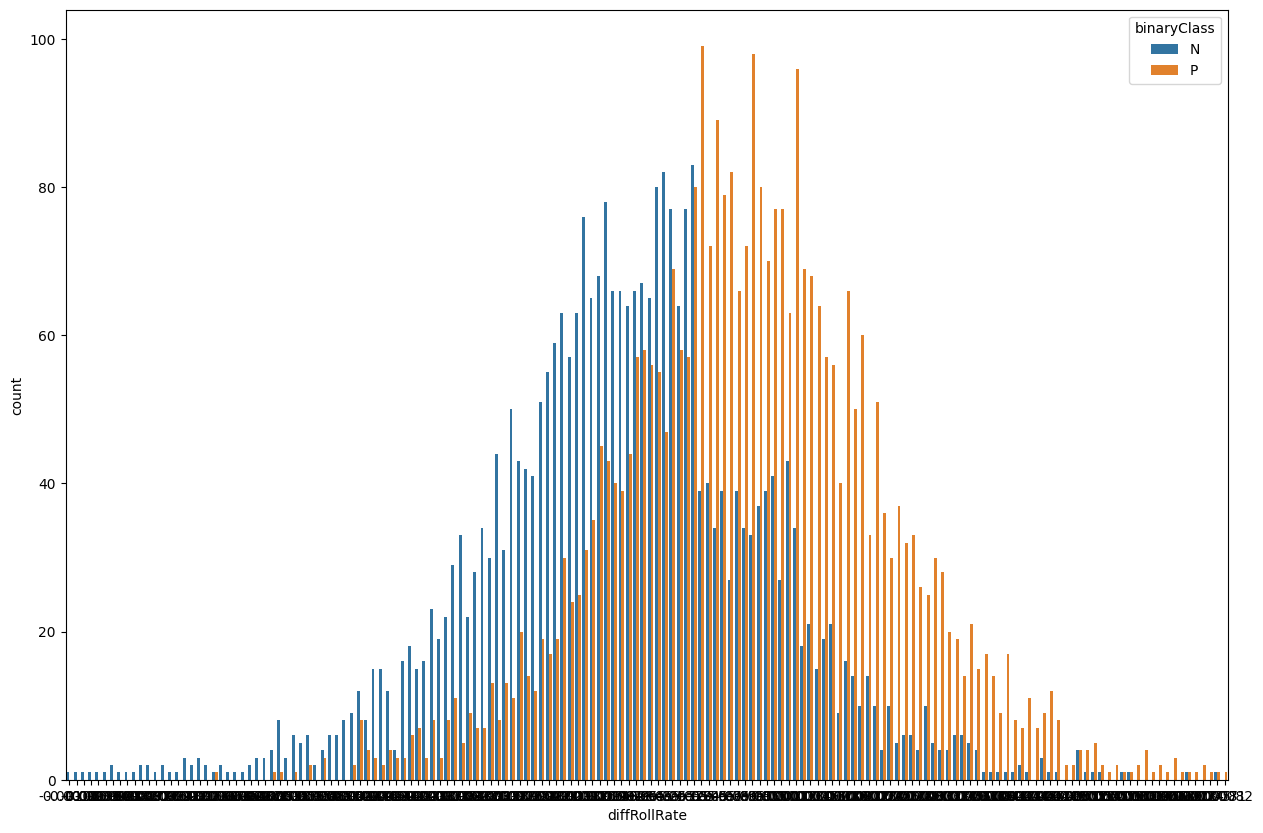

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='diffRollRate', hue='binaryClass')

In [26]:
movies_train = train_data.drop('binaryClass', axis=1)
movies_labels = train_data[['binaryClass']]

In [27]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('ord_enc', OrdinalEncoder())

])

movies_train_prepared = pipe.fit_transform(movies_train)

In [28]:
from sklearn.preprocessing import LabelEncoder


label_enc = LabelEncoder()

movies_labels_prepared = label_enc.fit_transform(movies_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(movies_train_prepared, movies_labels_prepared)

DecisionTreeClassifier()

DecisionTreeClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org **bold text**

In [30]:
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels):
    """
        Take the input data, model and labels and return accuracy

            """

    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)

    return acc

In [31]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    """
        Take the input data, model and labels and return confusion matrix

            """

    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)

    return cm

In [32]:
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    """
        Take the input data, model and labels and return confusion matrix

            """

    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)

    return report

In [33]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    """
        Take the input data, model and labels and return confusion matrix

            """

    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)

    return cm

In [34]:
accuracy(movies_train_prepared, tree_clf, movies_labels_prepared)

1.0

In [35]:
conf_matrix(movies_train_prepared, tree_clf, movies_labels_prepared)

array([[3001,    0],
       [   0, 3415]])

In [36]:
class_report(movies_train_prepared, tree_clf, movies_labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3001
           1       1.00      1.00      1.00      3415

    accuracy                           1.00      6416
   macro avg       1.00      1.00      1.00      6416
weighted avg       1.00      1.00      1.00      6416



In [37]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
               'max_leaf_nodes':[0,1,2,3,4,5]}

                                                                          #refit is true by default. The best estimator is trained on the whole dataset

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(movies_train_prepared, movies_labels_prepared)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. **bold text**

In [40]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [41]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       max_leaf_nodes=5, random_state=42)

In [42]:
tree_best = grid_search.best_estimator_

In [43]:
movies_data.columns


Index(['RollRate', 'PitchRate', 'currPitch', 'currRoll', 'diffRollRate',
       'binaryClass'],
      dtype='object')

[Text(0.4444444444444444, 0.875, 'RollRate <= 149.5\ngini = 0.5\nsamples = 6416\nvalue = [3208.0, 3208.0]\nclass = N'),
 Text(0.2222222222222222, 0.625, 'RollRate <= 134.5\ngini = 0.093\nsamples = 2906\nvalue = [2935.411, 150.302]\nclass = N'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.074\nsamples = 2754\nvalue = [2815.685, 112.726]\nclass = N'),
 Text(0.3333333333333333, 0.375, 'gini = 0.364\nsamples = 152\nvalue = [119.725, 37.575]\nclass = N'),
 Text(0.6666666666666666, 0.625, 'diffRollRate <= 67.5\ngini = 0.15\nsamples = 3510\nvalue = [272.589, 3057.698]\nclass = P'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.38\nsamples = 290\nvalue = [71.621, 209.483]\nclass = P'),
 Text(0.7777777777777778, 0.375, 'currPitch <= 19.5\ngini = 0.123\nsamples = 3220\nvalue = [200.968, 2848.216]\nclass = P'),
 Text(0.6666666666666666, 0.125, 'gini = 0.074\nsamples = 2532\nvalue = [91.932, 2297.736]\nclass = P'),


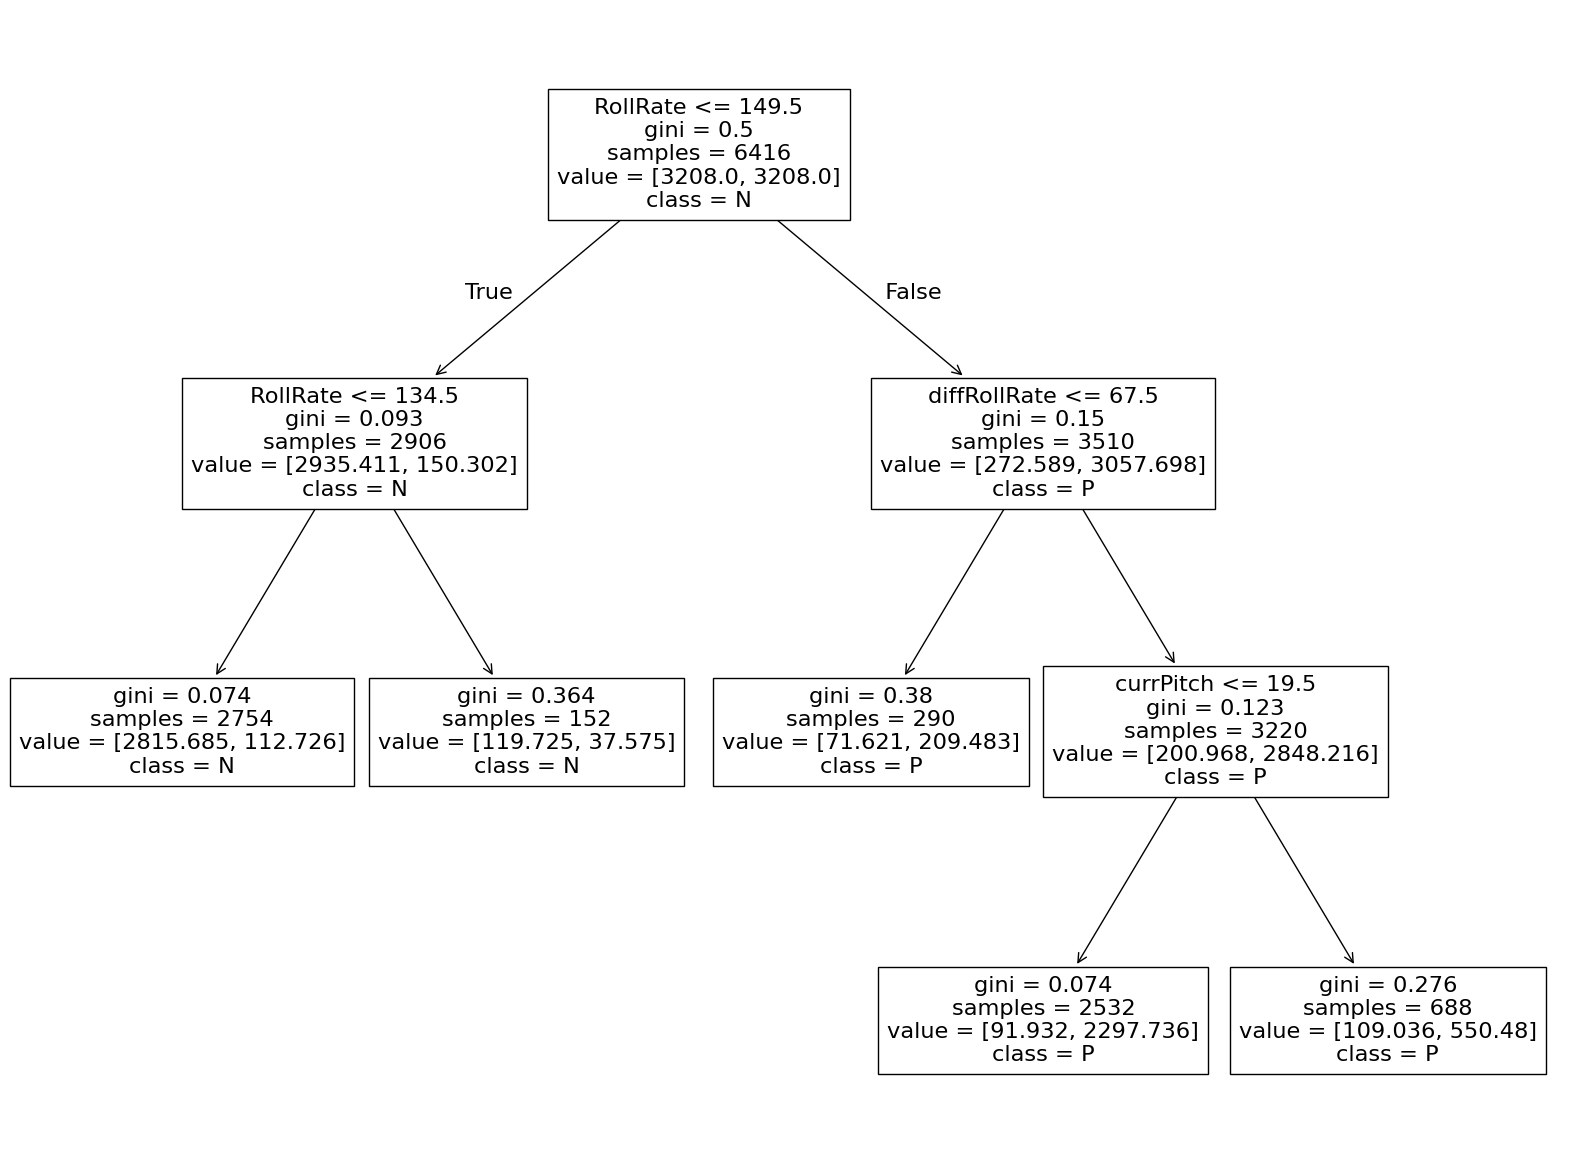

In [44]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=movies_train.columns, class_names=['N','P'])

In [45]:
accuracy(movies_train_prepared, tree_best, movies_labels_prepared)


0.9353179551122195

In [46]:
conf_matrix(movies_train_prepared, tree_best,movies_labels_prepared)


array([[2746,  255],
       [ 160, 3255]])

In [47]:
class_report(movies_train_prepared, tree_best, movies_labels_prepared)


              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3001
           1       0.93      0.95      0.94      3415

    accuracy                           0.94      6416
   macro avg       0.94      0.93      0.93      6416
weighted avg       0.94      0.94      0.94      6416



In [48]:
movies_test = test_data.drop('binaryClass', axis=1)
movies_test_labels = test_data['binaryClass']

In [49]:
     from sklearn.preprocessing import OrdinalEncoder

     # Assuming 'pipe' is your pipeline object
     for step_name, step in pipe.steps:
         if isinstance(step, OrdinalEncoder):
             step.set_params(handle_unknown='use_encoded_value', unknown_value=-1)

In [52]:
movies_test_prepared = pipe.transform(movies_test)

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


categorical_features = ['RollRate', 'PitchRate', 'YawRate']
numerical_features = ['Altitude', 'Time']


num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])


cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])


In [53]:
movies_test_labels_prepared = label_enc.transform(movies_test_labels)


In [54]:
accuracy(movies_test_prepared, tree_best, movies_test_labels_prepared)


0.9523141654978962

In [55]:
conf_matrix(movies_test_prepared, tree_best, movies_test_labels_prepared)


array([[321,  24],
       [ 10, 358]])

In [57]:
class_report(movies_test_prepared, tree_best, movies_test_labels_prepared)


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       345
           1       0.94      0.97      0.95       368

    accuracy                           0.95       713
   macro avg       0.95      0.95      0.95       713
weighted avg       0.95      0.95      0.95       713

